# MACHINE LEARNING MAJOR PROJECT FEB (ISHIKA SAINI)

### Problem Statement: Create a classification model to predict whether a person makes over $50k a year. 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

### Importing Libraries

In [55]:
df = pd.read_csv("adult.csv")

In [56]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [57]:
df.shape

(32560, 15)

### Changing Columns Names

In [58]:
df.columns = ['Age','Workclass','Fnlwgt','Education','Edu_no','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Hours_per_week','Native_country','Income']
df.head()

,Age,Workclass,Fnlwgt,Education,Edu_no,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


### Checking for null values 

In [59]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Edu_no            0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [60]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Edu_no             int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [61]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [62]:
df['Workclass'] = lb.fit_transform(df['Workclass'])
df['Workclass'].value_counts()

4    22696
6     2541
2     2093
0     1836
7     1297
5     1116
1      960
8       14
3        7
Name: Workclass, dtype: int64

In [63]:
df['Education'] = lb.fit_transform(df['Education'])
df['Education'].value_counts()

11    10501
15     7291
9      5354
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: Education, dtype: int64

In [64]:
df['Marital_status'] = lb.fit_transform(df['Marital_status'])
df['Marital_status'].value_counts()

2    14976
4    10682
0     4443
5     1025
6      993
3      418
1       23
Name: Marital_status, dtype: int64

In [65]:
df['Occupation'] = lb.fit_transform(df['Occupation'])
df['Occupation'].value_counts()

10    4140
3     4099
4     4066
1     3769
12    3650
8     3295
7     2002
0     1843
14    1597
6     1370
5      994
13     928
11     649
9      149
2        9
Name: Occupation, dtype: int64

In [66]:
df['Relationship'] = lb.fit_transform(df['Relationship'])
df['Relationship'].value_counts()

0    13193
1     8304
3     5068
4     3446
5     1568
2      981
Name: Relationship, dtype: int64

In [67]:
df['Race'] = lb.fit_transform(df['Race'])
df['Race'].value_counts()

4    27815
2     3124
1     1039
0      311
3      271
Name: Race, dtype: int64

In [68]:
df['Sex'] = lb.fit_transform(df['Sex'])
df['Sex'].value_counts()

1    21789
0    10771
Name: Sex, dtype: int64

In [69]:
df['Native_country'] = lb.fit_transform(df['Native_country'])
df['Native_country'].value_counts()

39    29169
26      643
0       583
30      198
11      137
2       121
33      114
8       106
19      100
5        95
9        90
23       81
35       80
3        75
22       73
6        70
40       67
13       64
24       62
31       60
4        59
36       51
14       44
20       43
32       37
27       34
29       31
10       29
12       29
7        28
21       24
17       20
1        19
38       19
25       18
37       18
41       16
28       14
16       13
18       13
34       12
15        1
Name: Native_country, dtype: int64

In [70]:
df['Income'] = lb.fit_transform(df['Income'])
df['Income'].value_counts()

0    24719
1     7841
Name: Income, dtype: int64

### Checking Correlation  

In [71]:
df.corr() ['Income']

Age               0.234039
Workclass         0.051645
Fnlwgt           -0.009481
Education         0.079311
Edu_no            0.335182
Marital_status   -0.199295
Occupation        0.075448
Relationship     -0.250924
Race              0.071853
Sex               0.215995
Capital_gain      0.223333
Capital_loss      0.150523
Hours_per_week    0.229690
Native_country    0.015845
Income            1.000000
Name: Income, dtype: float64

### Excluding Columns which is less relevant 

In [72]:
y = df['Income']
x = df.iloc[:,[0,1,3,4,6,8,9,10,11]]
print(x.shape,y.shape)

(32560, 9) (32560,)


### Spliting data into training and testing 

In [73]:
from sklearn.model_selection import train_test_split                  
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(y_tr.shape)
print(x_te.shape)
print(y_te.shape)

(24420, 9)
(24420,)
(8140, 9)
(8140,)


In [74]:
def apply_model(model) :
    model.fit(x_tr,y_tr)
    print('Accuracy',model.score(x_te,y_te))
    ypred = model.predict(x_te)
    print('Predicted Values\n',ypred)
    cm = confusion_matrix(y_te,ypred)
    print('Confusion Matrix\n',cm)
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification Report\n',classification_report(y_te,ypred))

## Applying different Models 

## 1) Logistic Regression 

C:\Users\HP-PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy 0.8002457002457003
Predicted Values
 [0 0 0 ... 0 0 0]
Confusion Matrix
 [[5974  241]
 [1385  540]]


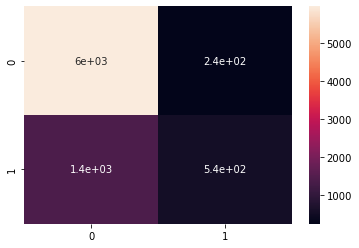

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      6215
           1       0.69      0.28      0.40      1925

    accuracy                           0.80      8140
   macro avg       0.75      0.62      0.64      8140
weighted avg       0.78      0.80      0.77      8140



In [75]:
m1 = LogisticRegression()
apply_model(m1)

## 2) Decision Tree 

Accuracy 0.8221130221130221
Predicted Values
 [0 0 0 ... 1 0 0]
Confusion Matrix
 [[5762  453]
 [ 995  930]]


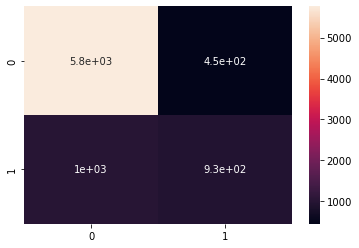

Classification Report
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      6215
           1       0.67      0.48      0.56      1925

    accuracy                           0.82      8140
   macro avg       0.76      0.71      0.73      8140
weighted avg       0.81      0.82      0.81      8140



In [76]:
m2 = DecisionTreeClassifier(criterion = 'gini', max_depth=5,min_samples_split=10)
apply_model(m2)

## 3) Random Forest 

Accuracy 0.8427518427518428
Predicted Values
 [0 0 0 ... 1 0 0]
Confusion Matrix
 [[5926  289]
 [ 991  934]]


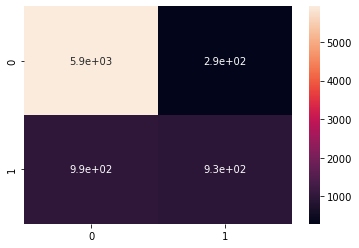

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      6215
           1       0.76      0.49      0.59      1925

    accuracy                           0.84      8140
   macro avg       0.81      0.72      0.75      8140
weighted avg       0.83      0.84      0.83      8140



In [77]:
m3 = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=15,min_samples_split=30)
apply_model(m3)

## 4) KNN 

Accuracy 0.835995085995086
Predicted Values
 [0 0 0 ... 1 0 0]
Confusion Matrix
 [[5828  387]
 [ 948  977]]


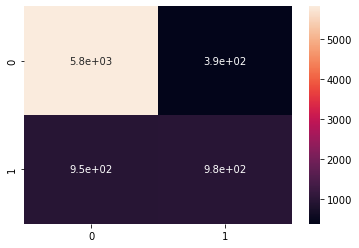

Classification Report
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      6215
           1       0.72      0.51      0.59      1925

    accuracy                           0.84      8140
   macro avg       0.79      0.72      0.75      8140
weighted avg       0.83      0.84      0.83      8140



In [78]:
m5 = KNeighborsClassifier(n_neighbors = 51)
apply_model(m5)

## 5) SVM 

Accuracy 0.803931203931204
Predicted Values
 [0 0 0 ... 0 0 0]
Confusion Matrix
 [[6026  189]
 [1407  518]]


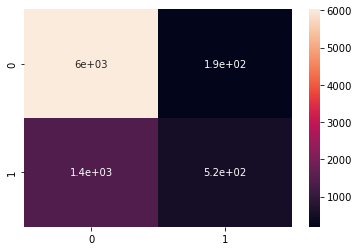

Classification Report
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      6215
           1       0.73      0.27      0.39      1925

    accuracy                           0.80      8140
   macro avg       0.77      0.62      0.64      8140
weighted avg       0.79      0.80      0.77      8140



In [79]:
m4 = SVC(random_state = 50)
apply_model(m4)

### SVM is not handling such big data. For Linear Kernel its getting stuck and is not responding after restarting the kernel again and again its repeteadly showing kernel is dead thats why i have to pass random states.

# CONCLUSION:

## Based on Precision, F1-Score, Recall Values, Prediction Pie charts, Accuracy Score and Confusion Matrix, We can say that RANDOM FOREST CLASSIFICATION IS BEST for this problem statement where we are predicting the person's income. 